# Introduction to PyCaret
# An open source low-code machine learning library

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)

You can reach pycaret website and documentation from https://pycaret.org

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.

PyCaret being a low-code library makes you more productive. With less time spent coding, you and your team can now focus on business problems.

PyCaret is simple and easy to use machine learning library that will help you to perform end-to-end ML experiments with less lines of code. 

PyCaret is a business ready solution. It allows you to do prototyping quickly and efficiently from your choice of notebook environment.


# We start by loading the libraries

In [7]:
import numpy as np 
import pandas as pd 
import pycaret

# let's install pycaret ! 

In [8]:
#!pip install pycaret

# Read our files

In [9]:
pwd

'D:\\Users\\kmahendra'

In [10]:
train = pd.read_csv('D:\\Users\\kmahendra\\titanic\\train.csv')
test  = pd.read_csv('D:\\Users\\kmahendra\\titanic\\test.csv')
sub   = pd.read_csv('D:\\Users\\kmahendra\\titanic\\gender_submission.csv')

# Import whole classification

In [11]:
from pycaret.classification import *

# let's see what we're dealing with

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
train2=train.copy()

In [18]:
#train1=train.fillna(method="ffill",axis=1)

In [20]:
#train1.info()

In [23]:
ok=np.mean(train.Age)
round(np.mean(train.Age))

30

In [38]:
values = {'Age': round(np.mean(train.Age))}
train2=train2.fillna(value=values)

In [39]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
import seaborn as sn

In [41]:
train2["Age"].value_counts()

30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

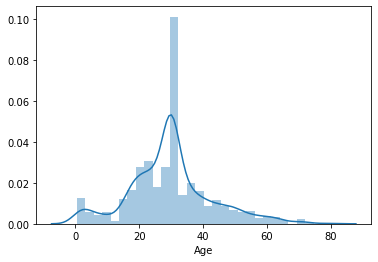

In [43]:
sn.distplot(train2["Age"])

In [44]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F2             3
              ..
B37            1
B42            1
C103           1
A14            1
C50            1
Name: Cabin, Length: 147, dtype: int64

# Set up our dataset (preprocessing)

In [45]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

#quite intuitive isn't it ?

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6505
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Compare the models

In [46]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.8202,0.862,0.6862,0.8251,0.7441,0.6077
1,Gradient Boosting Classifier,0.8122,0.8595,0.6696,0.8159,0.7299,0.5889
2,CatBoost Classifier,0.7993,0.8688,0.6777,0.7782,0.7207,0.5655
3,Ridge Classifier,0.7961,0,0.687,0.7647,0.7199,0.5608
4,Logistic Regression,0.7912,0.8424,0.7076,0.7484,0.7225,0.5559
5,Random Forest Classifier,0.7898,0.824,0.6737,0.7599,0.7081,0.5456
6,Light Gradient Boosting Machine,0.7896,0.8623,0.6817,0.7611,0.7139,0.5484
7,Ada Boost Classifier,0.7865,0.8415,0.7411,0.7208,0.7253,0.5516
8,Linear Discriminant Analysis,0.7848,0.8362,0.6828,0.7466,0.7078,0.5388
9,Decision Tree Classifier,0.7801,0.7677,0.7201,0.7199,0.715,0.5364


# let's create a Light GBM Model

In [47]:
lgbm  = create_model('lightgbm')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8254,0.8397,0.7917,0.7600,0.7755,0.6328
1,0.7778,0.8526,0.5833,0.7778,0.6667,0.5051
2,0.8413,0.8980,0.6250,0.9375,0.7500,0.6404
3,0.8065,0.9130,0.6087,0.8235,0.7000,0.5618
4,0.8065,0.8465,0.7083,0.7727,0.7391,0.5857
5,0.7742,0.8936,0.7500,0.6923,0.7200,0.5313
6,0.7903,0.8695,0.7500,0.7200,0.7347,0.5615
7,0.6774,0.7982,0.6250,0.5769,0.6000,0.3305
8,0.8226,0.8509,0.6667,0.8421,0.7442,0.6112
9,0.7742,0.8607,0.7083,0.7083,0.7083,0.5241


# Let's tune it!

In [48]:
tuned_lightgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8254,0.8355,0.7083,0.8095,0.7556,0.6207
1,0.7937,0.8050,0.5833,0.8235,0.6829,0.5365
2,0.8571,0.8766,0.7083,0.8947,0.7907,0.6845
3,0.8065,0.8896,0.6522,0.7895,0.7143,0.5699
4,0.7903,0.8147,0.5833,0.8235,0.6829,0.5330
5,0.7742,0.8596,0.7083,0.7083,0.7083,0.5241
6,0.8387,0.9211,0.7917,0.7917,0.7917,0.6601
7,0.7258,0.8054,0.7083,0.6296,0.6667,0.4352
8,0.8387,0.8339,0.7083,0.8500,0.7727,0.6493
9,0.7903,0.8547,0.7917,0.7037,0.7451,0.5681


# Confusion matrix

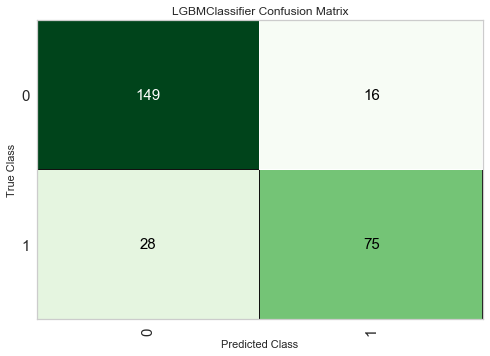

In [49]:
plot_model(estimator=tuned_lightgbm,plot="confusion_matrix")

# Learning curve

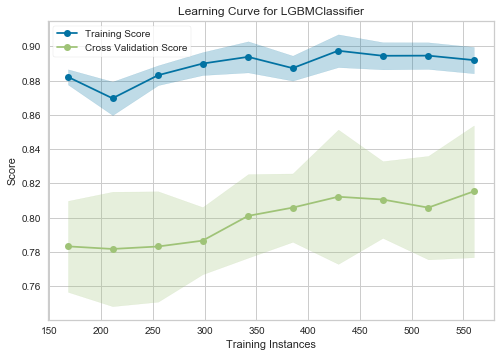

In [52]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

# AUC Curve

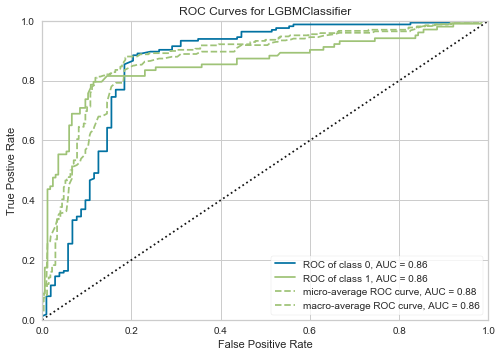

In [53]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')

# Confusion Matrix

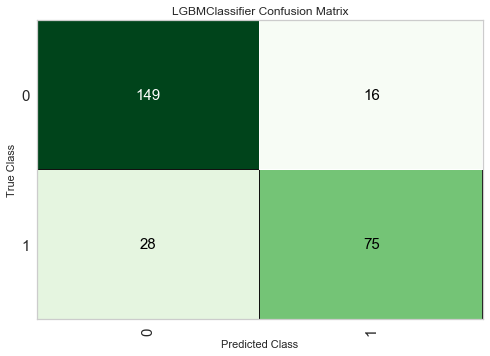

In [54]:
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

# Feature Importance

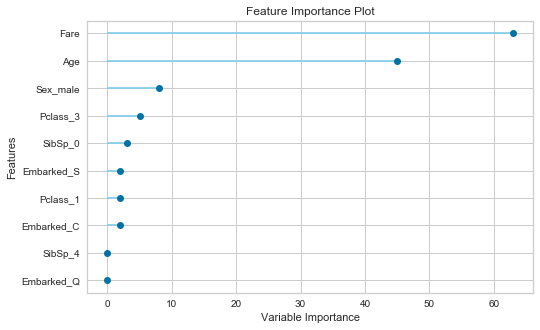

In [55]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

# whole thing!

In [60]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpretation

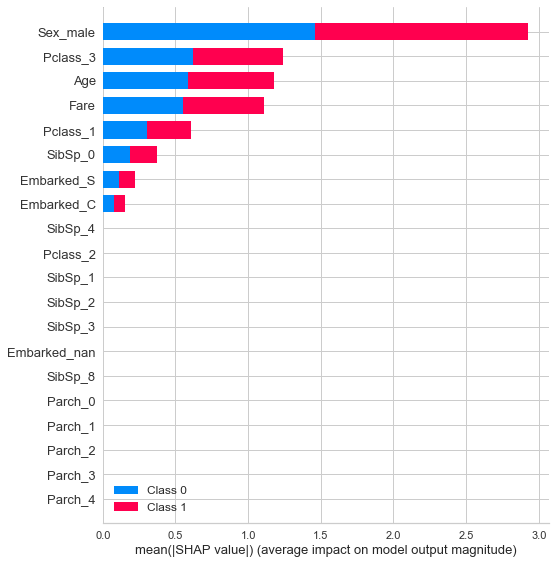

In [61]:
interpret_model(tuned_lightgbm)

# Predictions

In [62]:
predict_model(tuned_lightgbm, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0763
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.1070
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0458
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.3011
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.0979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0463
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9928
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0092
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0463


In [63]:
predictions = predict_model(tuned_lightgbm, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0763
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.1070
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0458
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.3011
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.0979


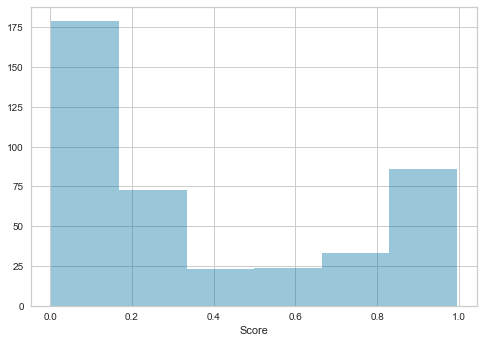

In [66]:
sn.distplot(predictions["Score"],kde=False)

In [67]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Label          418 non-null int32
Score          418 non-null float64
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 40.9+ KB


In [69]:
sub['Survived'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# Extra: Blending made easy!

In [70]:
logr  = create_model('lr');      
xgb   = create_model('xgboost');            

#blending 3 models
blend = blend_models(estimator_list=[tuned_lightgbm,logr,xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8254,0.0,0.7500,0.7826,0.7660,0.6268
1,0.7937,0.0,0.5833,0.8235,0.6829,0.5365
2,0.8254,0.0,0.5833,0.9333,0.7179,0.6010
3,0.8226,0.0,0.6957,0.8000,0.7442,0.6094
4,0.7903,0.0,0.5833,0.8235,0.6829,0.5330
5,0.8065,0.0,0.7500,0.7500,0.7500,0.5921
6,0.8548,0.0,0.8333,0.8000,0.8163,0.6964
7,0.7419,0.0,0.6667,0.6667,0.6667,0.4561
8,0.8387,0.0,0.7083,0.8500,0.7727,0.6493
9,0.8387,0.0,0.7917,0.7917,0.7917,0.6601


In [71]:
type(blend)

sklearn.ensemble._voting.VotingClassifier

# thank you very much for checking my notebook!